In [1]:
Url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

In [2]:
### import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
## load the data

df = pd.read_csv(Url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## use selected columns

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
usecols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']

In [6]:
df = df[usecols]
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


In [7]:
df.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Survived      int64
dtype: object

In [8]:
## Check for Null values

df.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

In [11]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

In [12]:
### let's see the percentage of missing values
df.isnull().mean()*100

Pclass       0.00000
Sex          0.00000
Age         19.86532
SibSp        0.00000
Parch        0.00000
Fare         0.00000
Survived     0.00000
dtype: float64

In [13]:
def impute_nan(df,variable,median):
  df[variable+"_median"]=df[variable].fillna(median)

In [14]:
median = df.Age.median()

In [15]:
median 

28.0

In [16]:
impute_nan(df,'Age',median)

In [17]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Age_median
0,3,male,22.0,1,0,7.2500,0,22.0
1,1,female,38.0,1,0,71.2833,1,38.0
2,3,female,26.0,0,0,7.9250,1,26.0
3,1,female,35.0,1,0,53.1000,1,35.0
4,3,male,35.0,0,0,8.0500,0,35.0


In [18]:
df.isnull().sum()

Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Survived        0
Age_median      0
dtype: int64

In [19]:
df.drop('Age', axis=1,inplace=True)

In [20]:
df.head()

,Pclass,Sex,SibSp,Parch,Fare,Survived,Age_median
0,3,male,1,0,7.2500,0,22.0
1,1,female,1,0,71.2833,1,38.0
2,3,female,0,0,7.9250,1,26.0
3,1,female,1,0,53.1000,1,35.0
4,3,male,0,0,8.0500,0,35.0


In [21]:
## Check for missing values
df.isnull().sum()

Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
Survived      0
Age_median    0
dtype: int64

In [22]:
count = 0

for i in df.isnull().sum():
  if i > 0:
    count = count + 1
print("Total number of rows with missing values is ", count)
print('Since it is only', round((count/len(df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  0
Since it is only 0 percent of the entire dataset the rows with missing values are excluded.


In [23]:
df.dtypes

Pclass          int64
Sex            object
SibSp           int64
Parch           int64
Fare          float64
Survived        int64
Age_median    float64
dtype: object

In [24]:
## Handling categorical variables

df['Sex'] = pd.factorize(df.Sex)[0]

In [25]:
df.dtypes

Pclass          int64
Sex             int64
SibSp           int64
Parch           int64
Fare          float64
Survived        int64
Age_median    float64
dtype: object

In [26]:
df.rename(columns={'Age_median': 'Age'}, inplace=True)
df.head()

,Pclass,Sex,SibSp,Parch,Fare,Survived,Age
0,3,0,1,0,7.2500,0,22.0
1,1,1,1,0,71.2833,1,38.0
2,3,1,0,0,7.9250,1,26.0
3,1,1,1,0,53.1000,1,35.0
4,3,0,0,0,8.0500,0,35.0


### Exploratory Data Analysis

In [27]:
df.corr()

,Pclass,Sex,SibSp,Parch,Fare,Survived,Age
Pclass,1.000000,-0.131900,0.083081,0.018443,-0.549500,-0.338481,-0.339898
Sex,-0.131900,1.000000,0.114631,0.245489,0.182333,0.543351,-0.081163
SibSp,0.083081,0.114631,1.000000,0.414838,0.159651,-0.035322,-0.233296
Parch,0.018443,0.245489,0.414838,1.000000,0.216225,0.081629,-0.172482
Fare,-0.549500,0.182333,0.159651,0.216225,1.000000,0.257307,0.096688
Survived,-0.338481,0.543351,-0.035322,0.081629,0.257307,1.000000,-0.064910
Age,-0.339898,-0.081163,-0.233296,-0.172482,0.096688,-0.064910,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


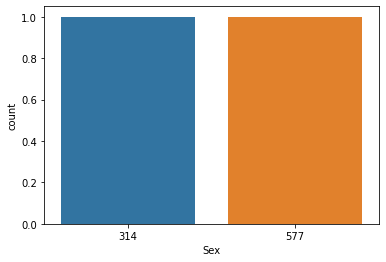

In [29]:
sns.countplot(df['Sex'].value_counts());

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


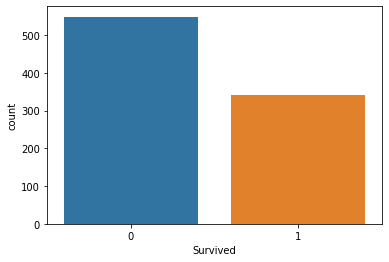

In [31]:
sns.countplot(df['Survived'])

### Independent & Dependent Features

In [32]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [33]:
X.head()

,Pclass,Sex,SibSp,Parch,Fare,Age
0,3,0,1,0,7.2500,22.0
1,1,1,1,0,71.2833,38.0
2,3,1,0,0,7.9250,26.0
3,1,1,1,0,53.1000,35.0
4,3,0,0,0,8.0500,35.0


In [34]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [35]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [36]:
## Standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
X_train

array([[-1.63788124, -0.72077194, -0.47416141,  1.99885349,  0.98099823,
        -1.91971935],
       [ 0.80326712, -0.72077194, -0.47416141, -0.47932706, -0.46963364,
        -0.0772525 ],
       [ 0.80326712,  1.38740139,  0.34868694,  0.75976322, -0.40613632,
        -2.15002771],
       ...,
       [ 0.80326712, -0.72077194,  1.17153529, -0.47932706, -0.34778742,
         0.92075038],
       [-1.63788124,  1.38740139,  0.34868694,  1.99885349,  1.72907416,
        -1.15202483],
       [-1.63788124, -0.72077194, -0.47416141,  0.75976322,  0.8913508 ,
        -0.61463866]])

In [39]:
X_test

array([[ 0.80326712, -0.72077194,  0.34868694,  0.75976322, -0.32547755,
        -0.0772525 ],
       [-0.41730706, -0.72077194, -0.47416141, -0.47932706, -0.41855727,
         0.15305586],
       [ 0.80326712, -0.72077194, -0.47416141, -0.47932706, -0.46906094,
        -0.69140812],
       ...,
       [-1.63788124, -0.72077194, -0.47416141, -0.47932706, -0.10376746,
         2.76321724],
       [ 0.80326712, -0.72077194, -0.47416141, -0.47932706, -0.45459629,
        -0.92171647],
       [-1.63788124, -0.72077194, -0.47416141, -0.47932706, -0.10376746,
        -0.0772525 ]])

In [40]:
import pickle
pickle.dump(scaler, open('scaled.pkl','wb'))

### Model Training

Using Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score

In [42]:
logreg = LogisticRegression()

In [43]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [46]:
y_preds = logreg.predict(X_test)

In [47]:
print('Accuracy score:', accuracy_score(y_preds, y_test))

Accuracy score: 0.8134328358208955


In [48]:
print(classification_report(y_preds, y_test))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       171
           1       0.71      0.81      0.76        97

    accuracy                           0.81       268
   macro avg       0.80      0.81      0.80       268
weighted avg       0.82      0.81      0.82       268



Using Decision Tree

In [51]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [52]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

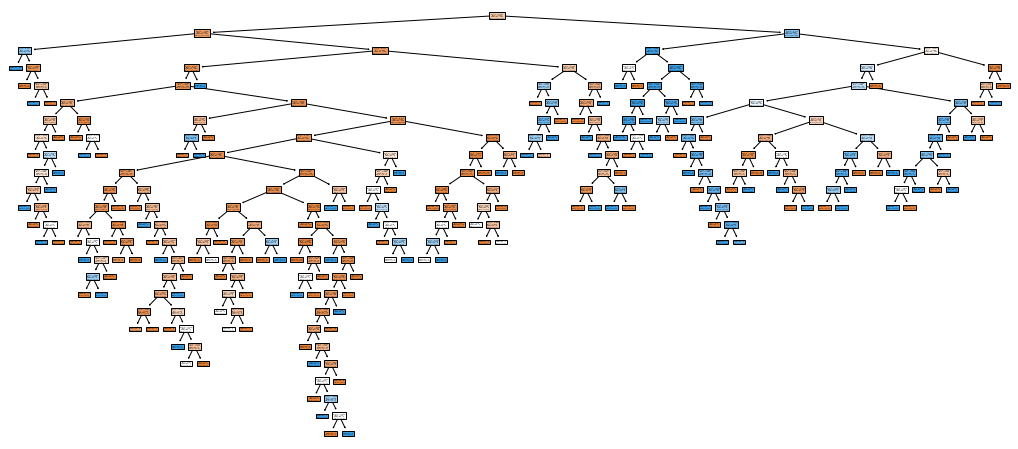

In [54]:
## Plot Tree 

plt.figure(figsize=(18,8))
tree.plot_tree(clf, filled=True);

In [53]:
clf.predict(X_test)

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0])

In [55]:
y_preds = clf.predict(X_test)

In [56]:
print('Accuracy Score :', accuracy_score(y_preds, y_test))

Accuracy Score : 0.7761194029850746


In [57]:
print(classification_report(y_preds, y_test))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       169
           1       0.68      0.76      0.71        99

    accuracy                           0.78       268
   macro avg       0.76      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



### Since the Accuracy, Precision and Recall score is better than Decision Tree model we will choose logreg model for our deployment 

### Pickling the model for Deployment 

In [58]:
import pickle

In [59]:
pickle.dump(logreg,open('logreg.pkl','wb'))

In [60]:
pickled_model = pickle.load(open('logreg.pkl','rb'))